In [8]:
#获取当前文件所在文件夹路径
import os
os.getcwd()

'/Users/yexianyong/Desktop/jupyter_notebook/library_learn'

In [9]:
#下载图片并显示

import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import requests,os

def show(img):
    fig,ax=plt.subplots()
    plt.imshow(img)
    plt.show()

url='https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1522658432796&di=953ee2e9cd8d5c886cdf3b6f8f292134&imgtype=0&src=http%3A%2F%2Fimgsrc.baidu.com%2Fimage%2Fc0%253Dshijue1%252C0%252C0%252C294%252C40%2Fsign%3D60c1df69c08065386fe7ac50ffb4cb31%2F0dd7912397dda1445ee63695b8b7d0a20cf4862e.jpg'
CAT_SAVE_PATH=os.path.join(os.getcwd(),'cat.{}'.format(url.split('.')[-1]))
if not os.path.exists(CAT_SAVE_PATH):
    response=requests.get(url)
    if response.status_code==200:

        with open(CAT_SAVE_PATH,'wb') as f:
            for chunk in response:
                f.write(chunk)
            print('{} is downloaded.'.format(os.path.basename(CAT_SAVE_PATH)))

show(mpimage.imread(CAT_SAVE_PATH))

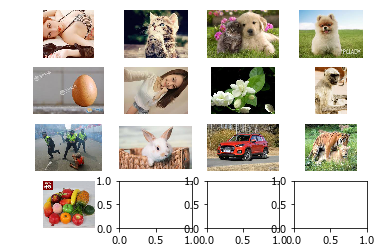

In [10]:
#下载的验证图片存放在/Users/yexianyong/Downloads/images              
import math,numpy

VERIFY_IMAGE_PATH='/Users/yexianyong/Downloads/images'     
for root,dirs,files in os.walk(VERIFY_IMAGE_PATH): 
    count=len(files)
    fig,axs=plt.subplots(math.ceil(count/4.0),4)

    axs_1d=numpy.array(axs).flat
    for i in range(count):
        file=files[i]
        img=mpimage.imread(os.path.join(root,file))
        ax=axs_1d[i]
        ax.set_axis_off()
        ax.imshow(img)
    plt.show()

In [8]:
import os
os.listdir('/Users/yexianyong/Desktop/machine_learn/project')

['.DS_Store',
 '__pycache__',
 'inception-v3.py',
 'logs',
 'MNIST_data',
 'neuro_network.py',
 'retrain.py',
 'retrian-inception-v3.py',
 'rnn_save_restore.py',
 'tensorboard.py',
 'tools.py',
 'verify-code-identify.py']

In [10]:
True+False+True

2

## [jupyter模块导入](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Importing%20Notebooks.html)

In [4]:
import sys
sys.path.append('../')
import ipynb_importer
import test_import_jupyter

test_import_jupyter.test_import_jupyter()

test_import_jupyter success.


In [10]:
#python lazy懒加载

class lazy(object): 
    def __init__(self, func): 
        self.func = func 
  
    def __get__(self, instance, cls): 
        val = self.func(instance) 
        setattr(instance, self.func.__name__, val) 
        return val 
  

class Circle(object): 
    def __init__(self, radius): 
        self.radius = radius 
  
    @lazy
    def area(self): 
        print ('evalute')
        return 3.14 * self.radius ** 2
  
c = Circle(4) 
print(c.radius )
print(c.area )
print(c.area )
print( c.area )

4
evalute
50.24
50.24
50.24


In [9]:
from datetime import datetime,timedelta
date=datetime.strptime('2017-10-1','%Y-%m-%d').date()
time=datetime.strptime('11:40','%H:%M').time()
datetime.combine(date+timedelta(days=1),time)

datetime.datetime(2017, 10, 2, 11, 40)

In [12]:
a=[1, 2, 3, 4, 5]
a[::2]

[1, 3, 5]

In [2]:
#线程安全的单例

import threading

def synchronized(func):
    func.lock=threading.Lock()
    
    def lock_func(*args,**kargs):
        with func.lock:
            return func(*args,**kargs)
    return lock_func


#python singleton
class Singleton():
    obj=None
    
    @synchronized
    def __new__(cls,*args,**kargs):
        if not cls.obj:
            cls.obj=super(Singleton,cls).__new__(cls,*args,**kargs)
        return cls.obj
    
s1=Singleton()
s2=Singleton()
s1,s2

(<__main__.Singleton at 0x106245390>, <__main__.Singleton at 0x106245390>)

In [28]:
def singleton(cls):
    instances={}
    def get_instance(*args,**kargs):
        if cls not in instances:
            instances[cls]=cls(*args,**kargs)
        return instances[cls]
    return get_instance

@singleton
class Test():
    pass

t1=Test()
t2=Test()
t1,t2

(<__main__.Test at 0x105431438>, <__main__.Test at 0x105431438>)

In [49]:
#元类编程
def say(self):
    return 'I am user'

class BaseClass():
    def answer(self):
        return 'base class'

User=type('User',(BaseClass,),{'name':'user','say':say})

user=User()
User.name,user.say(),user.answer()

('user', 'I am user', 'base class')

In [50]:
class MetaClass(type):
    def __new__(cls,*args,**kargs):
        return super().__new__(cls,*args,**kargs)
    
class User(metaclass=MetaClass):
    def __init__(self,name):
        self.name=name
    def __str__(self):
        return self.name
    
user=User(name='xander')
user.name

'xander'